In [10]:
import pandas as pd
import numpy as np

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from dateutil.parser import parse

In [12]:
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [14]:
df = pd.read_csv('../csv_fles/aus_drug_sell.csv', parse_dates=['date'])

In [15]:
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [16]:
df0 = pd.read_csv('../csv_fles/aus_drug_sell.csv', parse_dates=['date'], index_col='date')

In [17]:
df0.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [18]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,9), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

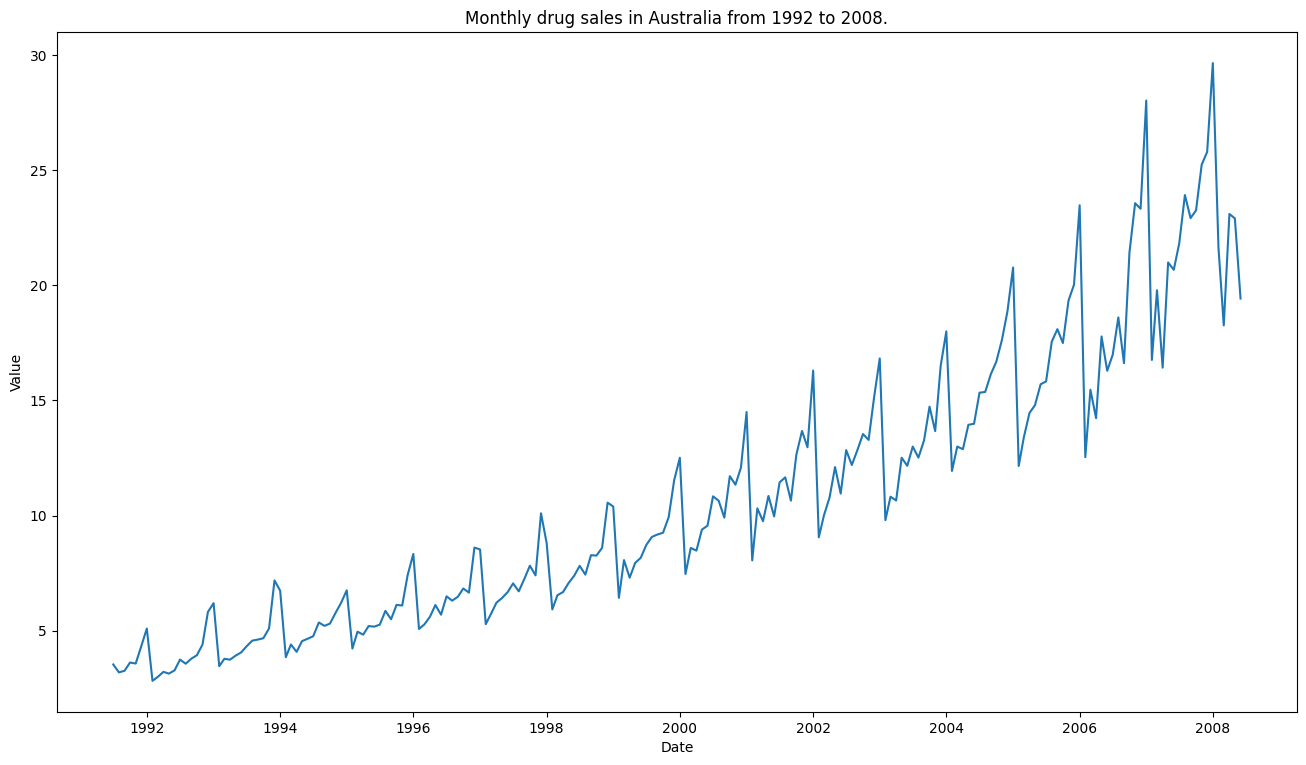

In [19]:
plot_df(df0, x=df0.index, y=df0.value, title='Monthly drug sales in Australia from 1992 to 2008.')    

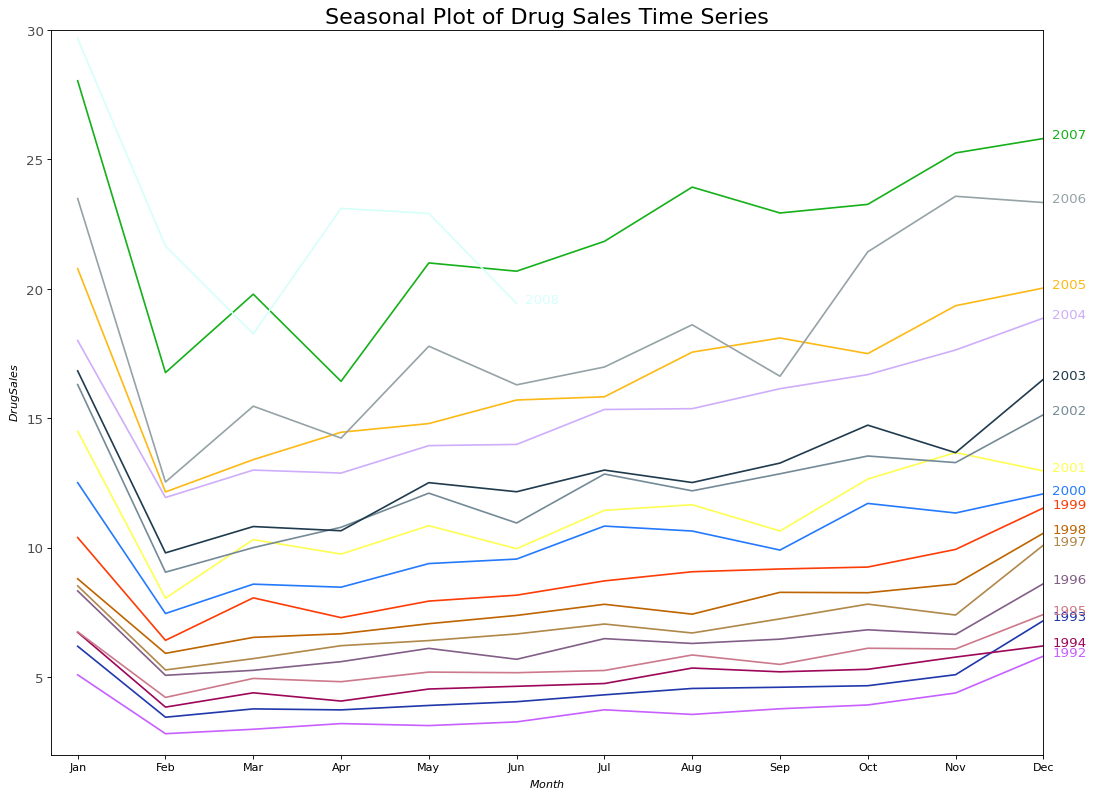

In [20]:
df0.reset_index(inplace=True)
df0['year'] = [d.year for d in df0.date]
df0['month'] = [d.strftime('%b') for d in df0.date]
years = df0['year'].unique()
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=df0.loc[df0.year==y, :], color=mycolors[i], label=y)
        plt.text(df0.loc[df0.year==y, :].shape[0]-.9, df0.loc[df0.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series", fontsize=20)
plt.show()

In [21]:
df0.head(n=10)

,date,value,year,month
0,1991-07-01,3.526591,1991,Jul
1,1991-08-01,3.180891,1991,Aug
2,1991-09-01,3.252221,1991,Sep
3,1991-10-01,3.611003,1991,Oct
4,1991-11-01,3.565869,1991,Nov
5,1991-12-01,4.306371,1991,Dec
6,1992-01-01,5.088335,1992,Jan
7,1992-02-01,2.814520,1992,Feb
8,1992-03-01,2.985811,1992,Mar
9,1992-04-01,3.204780,1992,Apr


In [23]:
df1 = pd.read_csv('../csv_fles/aus_drug_sell.csv', parse_dates=['date'], index_col='date')

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [25]:
from dateutil.parser import parse

In [26]:
res_mul = seasonal_decompose(df1['value'], model='multiplicative', extrapolate_trend='freq')
res_add = seasonal_decompose(df1['value'], model='additive', extrapolate_trend='freq')

In [28]:
type(res_mul)

statsmodels.tsa.seasonal.DecomposeResult

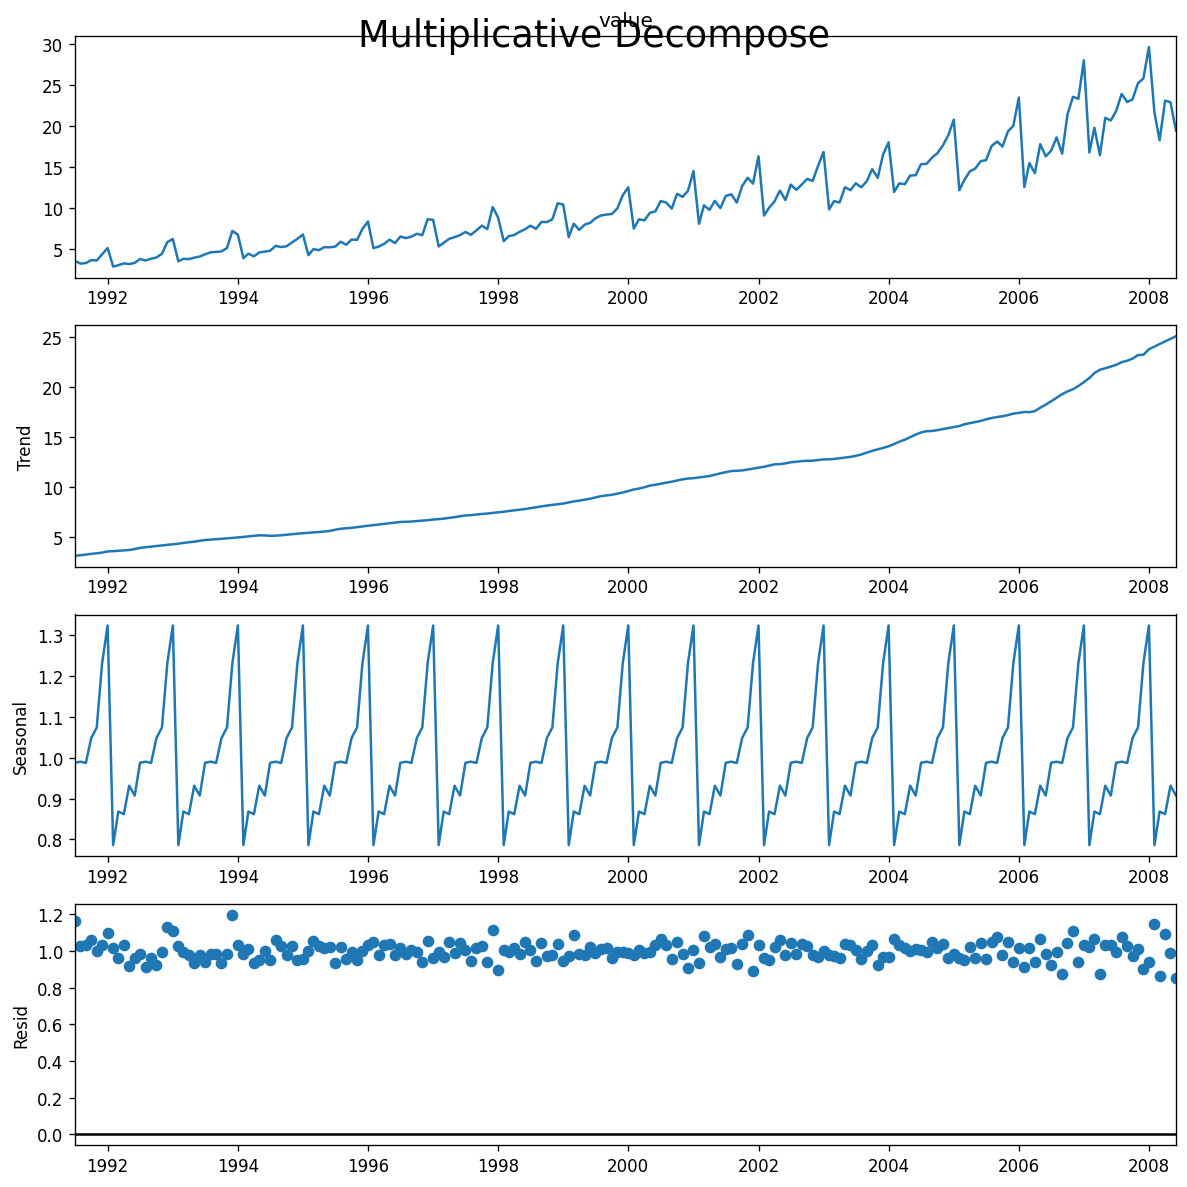

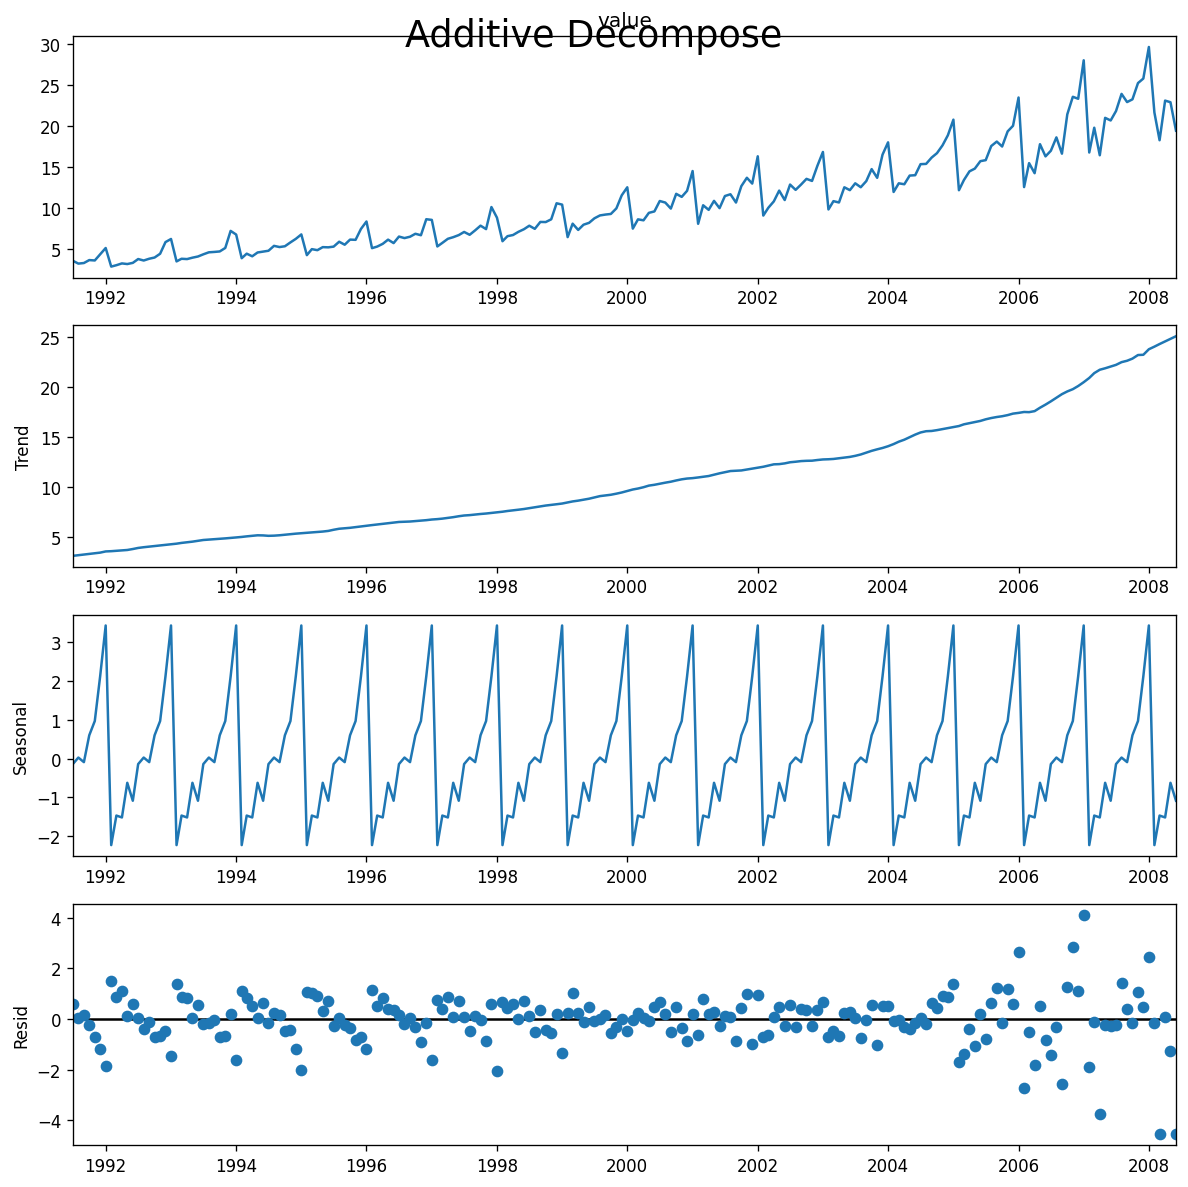

In [30]:
plt.rcParams.update({'figure.figsize': (10,10)})
res_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
res_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [29]:
deterended = df1['value'].values - res_mul.trend

In [30]:
type(deterended)

pandas.core.series.Series

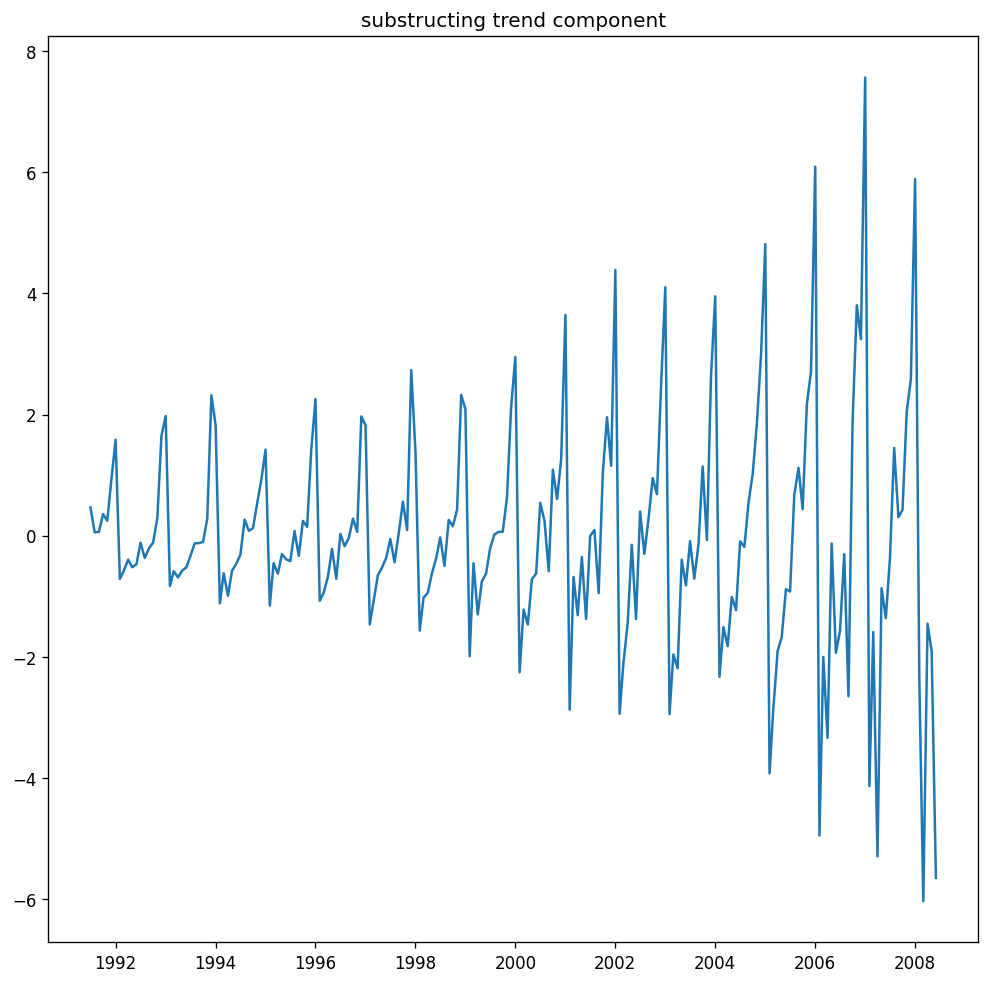

In [46]:
plt.plot(deterended)
plt.title('substructing trend component')
plt.show()

In [32]:
deseasonalized = df1['value'].values / res_mul.seasonal

In [33]:
type(deseasonalized)

pandas.core.series.Series

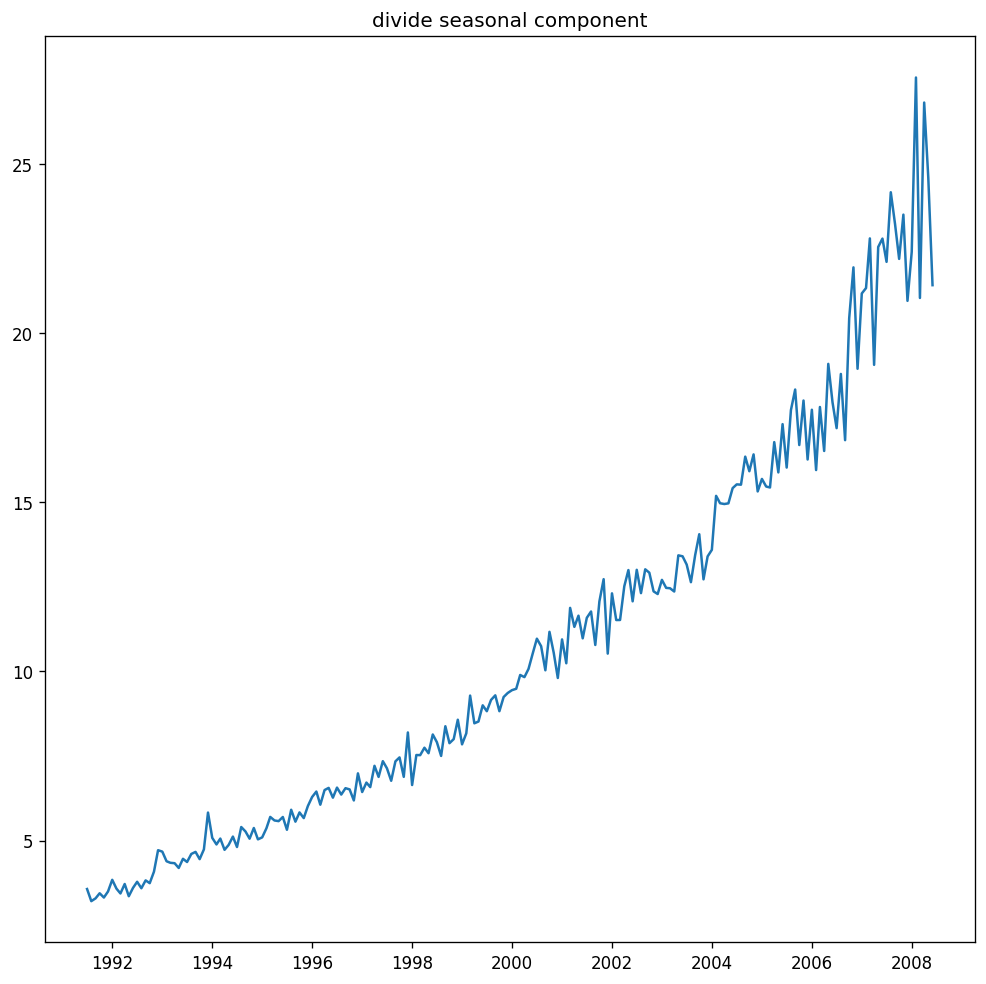

In [48]:
plt.plot(deseasonalized)
plt.title('divide seasonal component')
plt.show()

In [33]:
df_reconstructed.head()

,value,seasonal,trend,resid
date,,,,
1991-07-01,3.526591,0.987845,3.060085,1.166629
1991-08-01,3.180891,0.990481,3.124765,1.027745
1991-09-01,3.252221,0.987476,3.189445,1.032615
1991-10-01,3.611003,1.048329,3.254125,1.058513
1991-11-01,3.565869,1.074527,3.318805,0.999923


In [34]:
from statsmodels.tsa.stattools import adfuller, kpss

In [35]:
df2 = pd.read_csv('aus_drug_sell.csv', parse_dates=['date'], index_col='date')

In [36]:
adf = adfuller(df2.value.values, autolag='AIC')
kpss = kpss(df2.value.values, regression='c')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [37]:
print(f'ADF Statistic: {adf[0]}')
print(f'p-value: {adf[1]}')
for key, value in adf[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 3.1451856893067442
p-value: 1.0
Critial Values:
   1%, -3.465620397124192
Critial Values:
   5%, -2.8770397560752436
Critial Values:
   10%, -2.5750324547306476


In [38]:
print('\nKPSS Statistic: %f' % kpss[0])
print('p-value: %f' % kpss[1])
for key, value in kpss[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


KPSS Statistic: 1.313675
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


In [39]:
from scipy import signal

In [40]:
import statsmodels.formula.api as smf

In [41]:
df3 = pd.read_csv('mtcars.csv', usecols=['mpg', 'wt'])

In [42]:
df3.head()

,mpg,wt
0,4.582576,2.620
1,4.582576,2.875
2,4.774935,2.320
3,4.626013,3.215
4,4.324350,3.440


In [43]:
model = smf.ols('mpg ~ wt', data=df3).fit()

In [44]:
print(model.pvalues)

Intercept    4.891527e-25
wt           2.146343e-11
dtype: float64


In [49]:
from pandas.plotting import autocorrelation_plot
df4 = pd.read_csv('aus_drug_sell.csv')

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

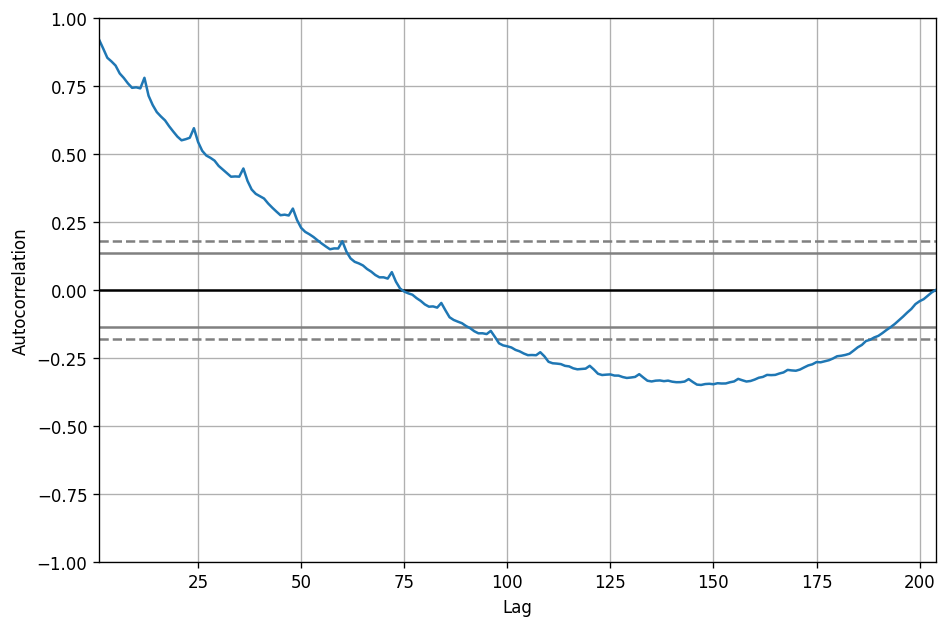

In [50]:
plt.rcParams.update({'figure.figsize':(9,6), 'figure.dpi':120})
autocorrelation_plot(df4.value.to_list())

In [51]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

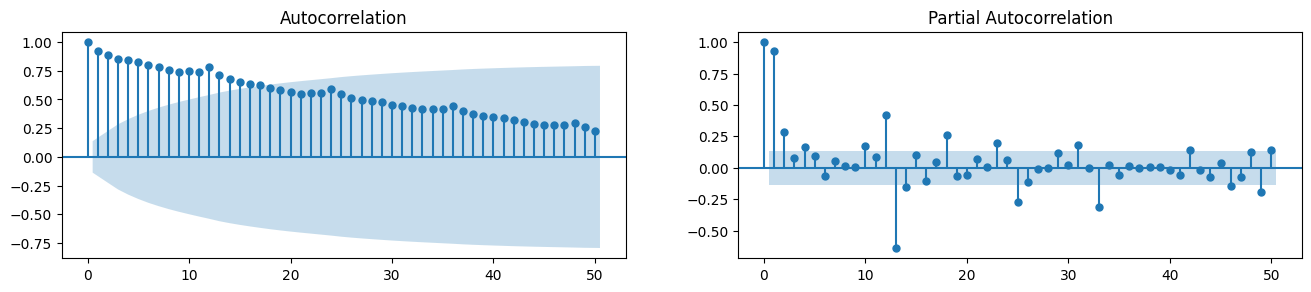

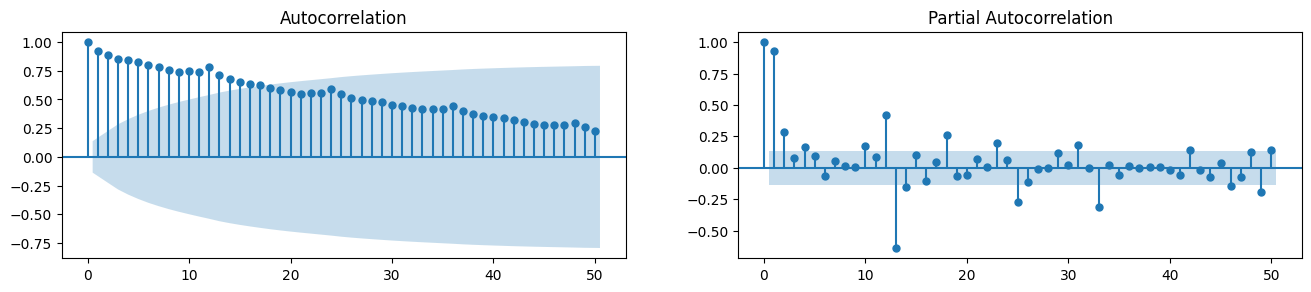

In [52]:
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df4.value.tolist(), lags=50, ax=axes[0])
plot_pacf(df4.value.tolist(), lags=50, ax=axes[1])

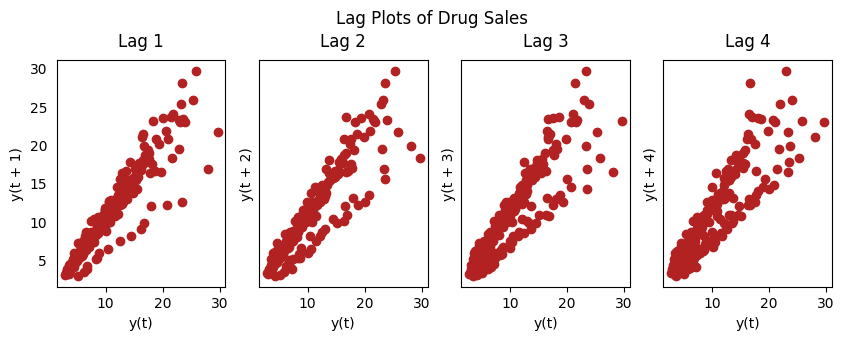

In [53]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df4.value, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))
fig.suptitle('Lag Plots of Drug Sales', y=1.05)    
plt.show()

In [54]:
ssa4 = pd.read_csv('sun_spot_area.csv')
rnd_small = np.random.randint(0, 100, size=36)
rnd_big = np.random.randint(0, 100, size=136)

In [55]:
def ApEn(U, m, r):
    """Compute Aproximate entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)
    return abs(_phi(m+1) - _phi(m))
print(ApEn(ssa4.value, m=2, r=0.2*np.std(ssa4.value)))     # 0.651
print(ApEn(df4.value, m=2, r=0.2*np.std(df4.value)))   # 0.537
print(ApEn(rnd_small, m=2, r=0.2*np.std(rnd_small))) # 0.143
print(ApEn(rnd_big, m=2, r=0.2*np.std(rnd_big)))     # 0.716

0.6514704970333534
0.5374775224973489
0.16083502693096996
0.5972926771842966


In [57]:
def SampEn(U, m, r):
    """Compute Sample entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for j in range(len(x)) if i != j and _maxdist(x[i], x[j]) <= r]) for i in range(len(x))]
        return sum(C)

    N = len(U)
    return -np.log(_phi(m+1) / _phi(m))

print(SampEn(ssa4.value, m=2, r=0.2*np.std(ssa4.value)))      # 0.78
print(SampEn(df4.value, m=2, r=0.2*np.std(df4.value)))    # 0.41
print(SampEn(rnd_small, m=2, r=0.2*np.std(rnd_small)))  # 1.79
print(SampEn(rnd_big, m=2, r=0.2*np.std(rnd_big)))      # 2.42

0.7853311366380039
0.41887013457621214
inf


<ipython-input-57-1acf525d4aed>:12: RuntimeWarning: divide by zero encountered in log
  return -np.log(_phi(m+1) / _phi(m))


2.0794415416798357
